# Working with Images

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cv2.__version__

'4.5.5'

In [9]:
# loading images

img1 = cv2.imread('forest.jpg')
img2 = cv2.imread('people-walking.jpg')
img3 = cv2.imread('cat.jpg')

print(type(img2))
print("showing the size of  image 1", img1.shape)
print("showing the size of  image 2", img2.shape)


<class 'numpy.ndarray'>
showing the size of  image 1 (450, 450, 3)
showing the size of  image 2 (531, 820, 3)


In [10]:
# resizing the images
img1_resized = cv2.resize(img1,(300,300),interpolation=cv2.INTER_AREA)
img2_resized = cv2.resize(img2,(300,300),interpolation=cv2.INTER_AREA)
img3_resized = cv2.resize(img3,(300,300),interpolation=cv2.INTER_AREA)

print("showing the size of  image 1", img1_resized.shape)
print("showing the size of  image 2", img2_resized.shape)

showing the size of  image 1 (300, 300, 3)
showing the size of  image 2 (300, 300, 3)


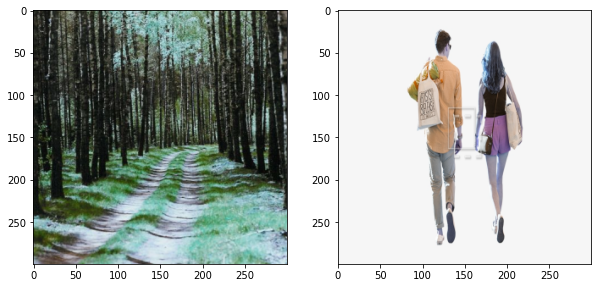

In [5]:
# plotting the images
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img1_resized)
plt.subplot(122)
plt.imshow(img2_resized)


Text(0.5, 1.0, 'Blue Channel')

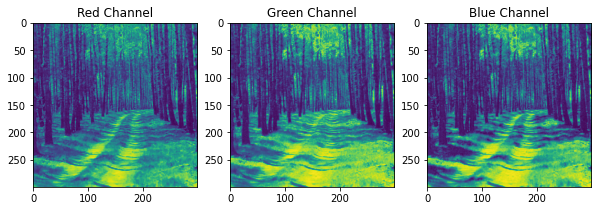

In [6]:
# print RGB channels
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img1_resized[:,:,0])
plt.gca().set_title("Red Channel")
plt.subplot(132)
plt.imshow(img1_resized[:,:,1])
plt.gca().set_title("Green Channel")
plt.subplot(133)
plt.imshow(img1_resized[:,:,2])
plt.gca().set_title("Blue Channel")



## Documentation: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

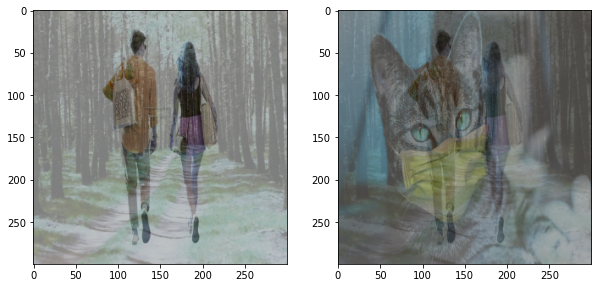

In [11]:
# Adding two images
dst = cv2.addWeighted(img2_resized,0.5,img1_resized,0.3,0.1)
three_img = cv2.addWeighted(dst,0.5,img3_resized,0.3,0.1) 

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(dst)
plt.subplot(122)
plt.imshow(three_img)

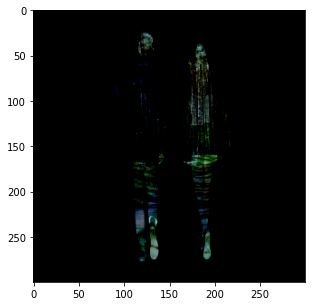

In [13]:
dst_subt = cv2.subtract(img1_resized,img2_resized)
plt.figure(figsize=(5,5))
plt.imshow(dst_subt)

(-0.5, 1999.5, 1332.5, -0.5)

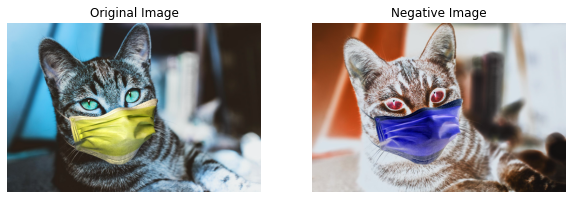

In [15]:
#Computing the negative image.

negative = 255 - img3
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img3)
plt.gca().set_title("Original Image")
plt.axis("off")
plt.subplot(122)
plt.imshow(negative)
plt.gca().set_title("Negative Image")
plt.axis("off")

Text(0.5, 1.0, 'Gaussian Image')

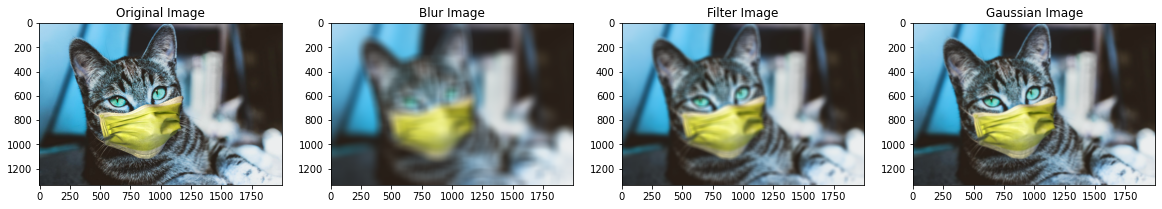

In [17]:
#Using filters to blur the images

img_blur = cv2.blur(img3,(80,80))
img_filter = cv2.boxFilter(img3,-5,(30,30),normalize=True)
img_gaussianfilter = cv2.GaussianBlur(img3,(41,41),cv2.BORDER_DEFAULT)

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.imshow(img3)
plt.gca().set_title("Original Image")
plt.subplot(142)
plt.imshow(img_blur)
plt.gca().set_title("Blur Image")
plt.subplot(143)
plt.imshow(img_filter)
plt.gca().set_title("Filter Image")
plt.subplot(144)
plt.imshow(img_gaussianfilter)
plt.gca().set_title("Gaussian Image")

(-0.5, 1999.5, 1332.5, -0.5)

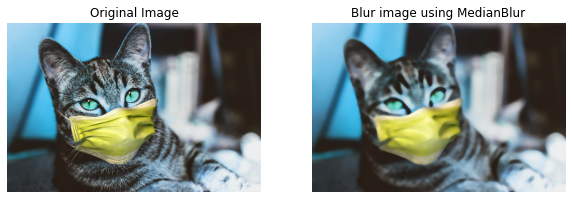

In [18]:
img_median = cv2.medianBlur(img3,31)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img3)
plt.gca().set_title("Original Image")
plt.axis("off")
plt.subplot(122)
plt.imshow(img_median)
plt.gca().set_title("Blur image using MedianBlur")
plt.axis("off")

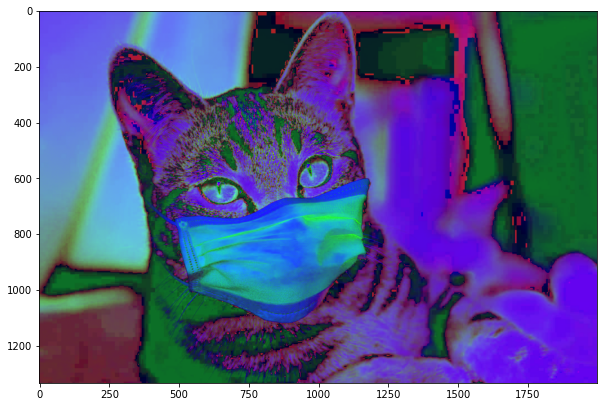

In [20]:
# converting colormap
img_cat_hsv = cv2.cvtColor(img3,cv2.cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))
plt.imshow(img_cat_hsv)

[191 191  61]


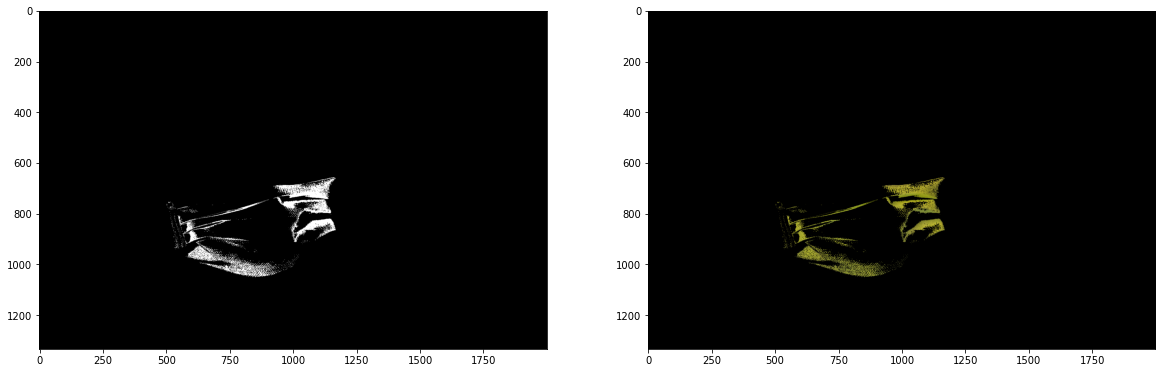

In [23]:
# Segmentation

print(img3[800,1000,:])
upper_limit = (119,119,13)#(13,119,119)
lower_limit = (191,191,61)#(61,119,119)
mask = cv2.inRange(img3,upper_limit,lower_limit)
result = cv2.bitwise_and(img3,img3,mask=mask)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(mask, cmap="gray")
plt.subplot(122)
plt.imshow(result)